In [35]:
#preprocessing tools
import pandas as pd
import numpy as np
import re

#EDA Tools
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
plt.figure(figsize=(20,10))
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Modeling
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA


<Figure size 1440x720 with 0 Axes>

## preprocessing

In [2]:
data=pd.read_csv('daily-total-female-births-in-cal.csv',index_col=[0],parse_dates=[0])

In [3]:
data.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
data.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1959-01-01 to Daily total female births in California
Data columns (total 1 columns):
Daily total female births in California, 1959    366 non-null int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [6]:
data.size

366

In [7]:
data.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [8]:
data = data[0:365]

In [9]:
data.size

365

In [10]:
data.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [11]:
data.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


## Explorartory Data Analysis(EDA)

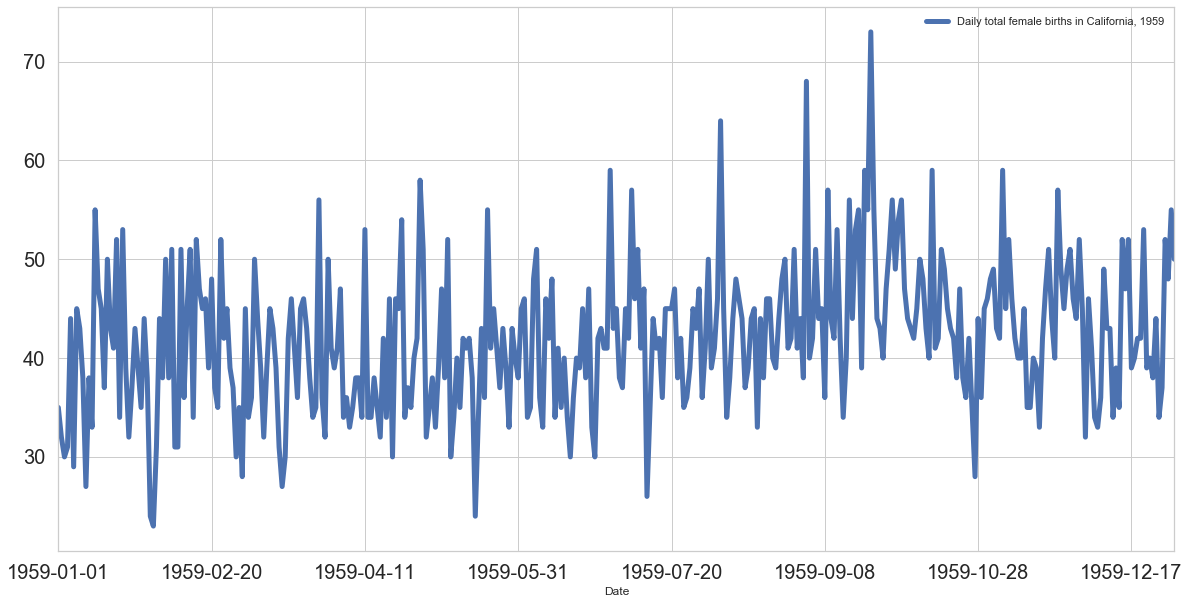

In [12]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [13]:
data_mean=data.rolling(window = 30).mean()

In [14]:
data_mean

,"Daily total female births in California, 1959"
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,41.700000
1959-12-28,41.900000
1959-12-29,42.033333


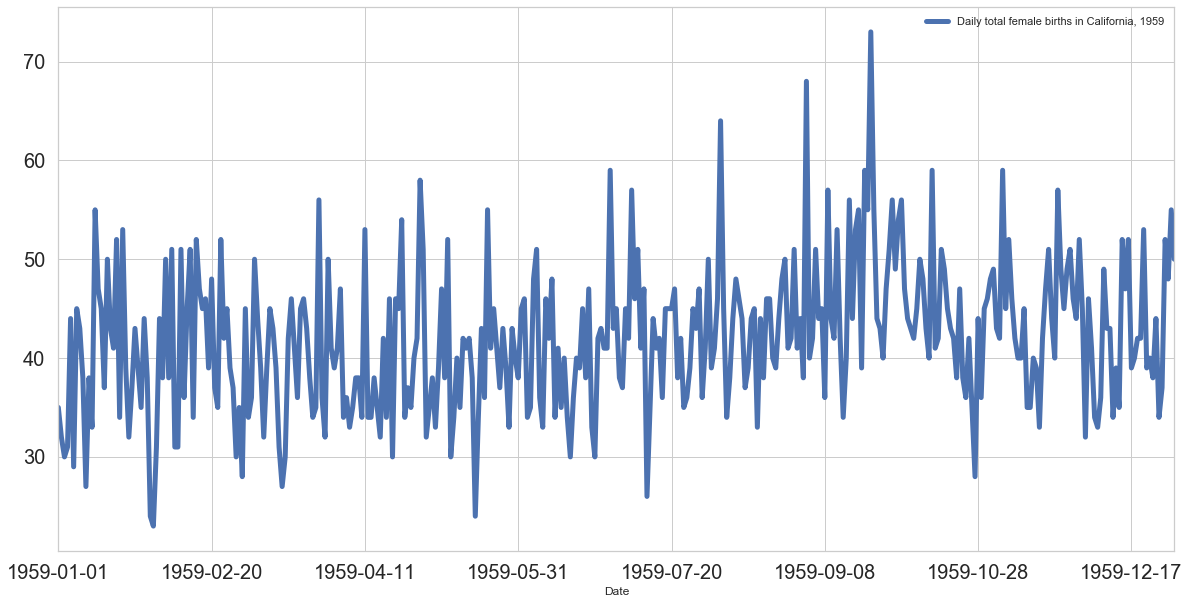

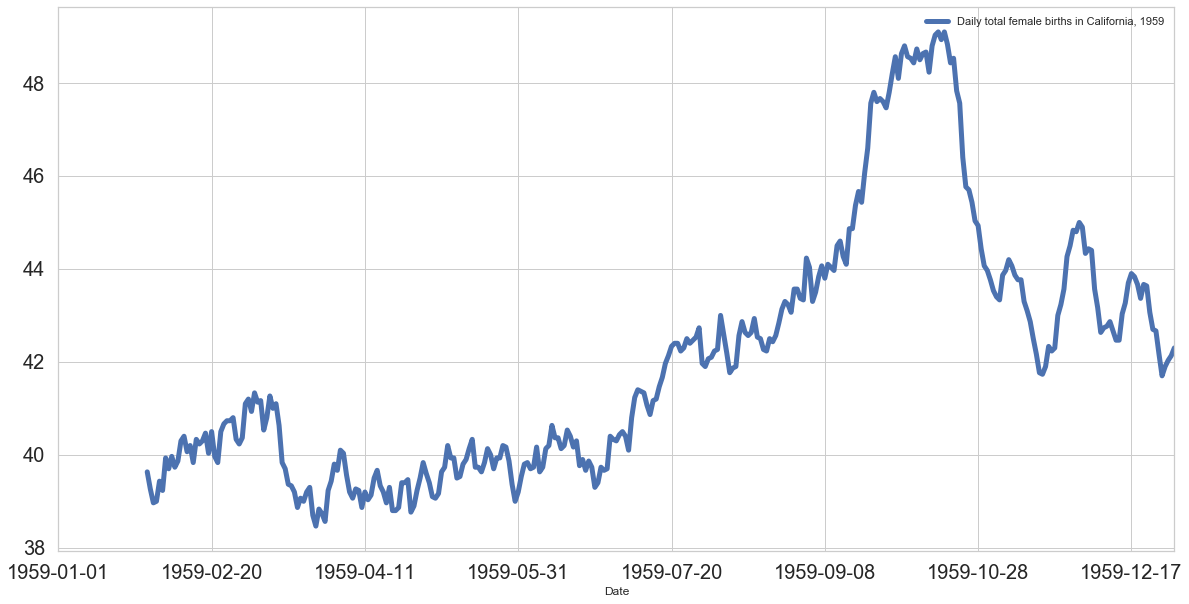

In [15]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
data_mean.plot(figsize=(20,10), linewidth=5, fontsize=20)

## Modeling

In [16]:
series_values=pd.DataFrame(data.values)

In [17]:
birth_data=pd.concat([series_values,series_values.shift(1)],axis='columns')

In [18]:
birth_data.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [19]:
birth_data.columns = ['Actual_Birth','Forecast_Birth']

In [20]:
birth_data

,Actual_Birth,Forecast_Birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [21]:
birth_test = birth_data[1:]

In [22]:
birth_test.head()

,Actual_Birth,Forecast_Birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [23]:
birth_test.tail()

,Actual_Birth,Forecast_Birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [24]:
birth_error = mean_squared_error(birth_test.Actual_Birth,birth_test.Forecast_Birth)

In [25]:
birth_error

84.22252747252747

In [26]:
np.sqrt(birth_error) ## error should go down has much has possible

9.177283229394606

In [27]:
##ARIMA - AutoRegressive(p) Integrated (d) Moving Average(q)
##D distance of the value (A-A2) Value may test vary 0,1 and max 2

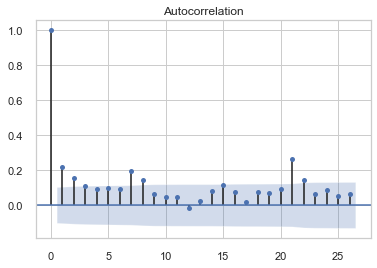

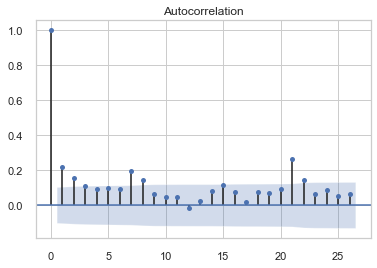

In [28]:
## AIRMA (p,d,q)
plot_acf(data)  ## indentify parameters  Q 2,3,4

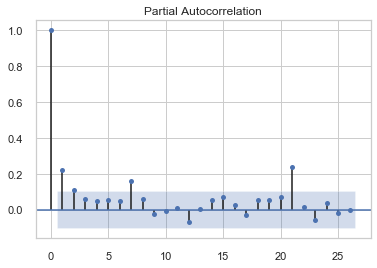

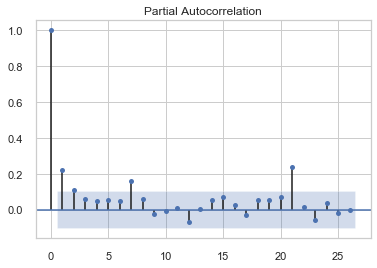

In [29]:
plot_pacf(data)  ## indentify parameters  p 2,3

## p=2,3 d=0 q= 3,4

In [61]:
data.size

365

In [62]:
train_data = data[0:300]

In [63]:
test_data =data[330:365]

In [64]:
train_data.size

300

In [65]:
test_data.size

35

In [80]:
birth_model = ARIMA(train_data,order=(3,1,2))

C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [81]:
birth_model_fit=birth_model.fit()

C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [82]:
birth_model_fit.aic

2038.721882863421

In [83]:
birth_forecast=birth_model_fit.forecast(steps = 35)[0]

In [84]:
birth_forecast

array([42.25872625, 43.38071823, 43.69500409, 43.86538385, 44.00990511,
       44.14165203, 44.26316686, 44.37556606, 44.47972508, 44.57642081,
       44.66635515, 44.7501638 , 44.82842266, 44.90165351, 44.97032904,
       45.03487752, 45.09568696, 45.15310887, 45.20746174, 45.25903409,
       45.30808734, 45.35485832, 45.3995616 , 45.44239157, 45.48352434,
       45.52311948, 45.56132155, 45.59826152, 45.63405804, 45.66881862,
       45.70264064, 45.73561235, 45.76781368, 45.79931707, 45.83018813])

In [85]:
test_data

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [86]:
np.sqrt(mean_squared_error(test_data,birth_forecast))

6.868045853952301